## **Ronald Pukadyil**

**Question 1: Data model**

Note: User_Id should be unique and should be used as a primary key, but that is one of the major data quality concerns where the ids are not unique and the data is repeated several times.

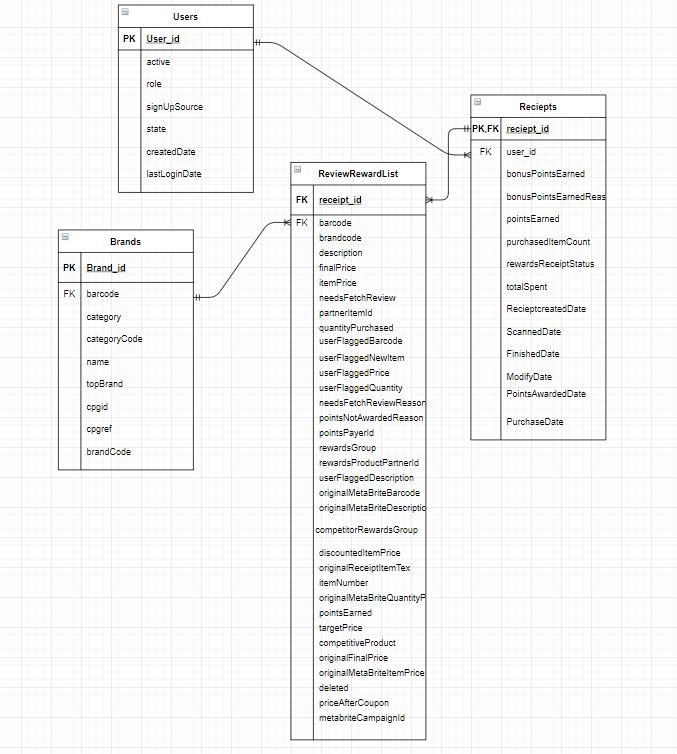

**Data cleaning and pre-processing**

In [ ]:
# Importing users.json file and storing it in a dataframe

import json
import pandas as pd

ron = []
for line in open('users.json', 'r'):
    ron.append(json.loads(line))
df_nested_ron = pd.json_normalize(ron)

In [ ]:
# Renaming the normalized columns

df_nested_ron = df_nested_ron.rename(columns={'_id.$oid':'user_id','createdDate.$date':'createdDate','lastLogin.$date':'lastLoginDate' })

In [ ]:
# Changing the date columns to datetime format since they were in int datatype

df_nested_ron['createdDate'] = pd.to_datetime(df_nested_ron['createdDate'])
df_nested_ron['lastLoginDate'] = pd.to_datetime(df_nested_ron['lastLoginDate'])

In [ ]:
# Performing the same with brands data 
brand = []

for line in open('brands.json', 'r'):
    brand.append(json.loads(line))

df_nested_brand = pd.json_normalize(brand)

df_nested_brand = df_nested_brand.rename(columns={'_id.$oid':'brand_id','cpg.$id.$oid':'cpgid','cpg.$ref':'cpgref' })

df_nested_brand

,barcode,category,categoryCode,name,topBrand,brand_id,cpgid,cpgref,brandCode
0,511111019862,Baking,BAKING,test brand @1612366101024,False,601ac115be37ce2ead437551,601ac114be37ce2ead437550,Cogs,NaN
1,511111519928,Beverages,BEVERAGES,Starbucks,False,601c5460be37ce2ead43755f,5332f5fbe4b03c9a25efd0ba,Cogs,STARBUCKS
2,511111819905,Baking,BAKING,test brand @1612366146176,False,601ac142be37ce2ead43755d,601ac142be37ce2ead437559,Cogs,TEST BRANDCODE @1612366146176
3,511111519874,Baking,BAKING,test brand @1612366146051,False,601ac142be37ce2ead43755a,601ac142be37ce2ead437559,Cogs,TEST BRANDCODE @1612366146051
4,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,False,601ac142be37ce2ead43755e,5332fa12e4b03c9a25efd1e7,Cogs,TEST BRANDCODE @1612366146827
...,...,...,...,...,...,...,...,...,...
1162,511111116752,Baking,BAKING,test brand @1601644365844,NaN,5f77274dbe37ce6b592e90c0,5f77274dbe37ce6b592e90bf,Cogs,NaN
1163,511111706328,Breakfast & Cereal,NaN,Dippin Dots® Cereal,NaN,5dc1fca91dda2c0ad7da64ae,53e10d6368abd3c7065097cc,Cogs,DIPPIN DOTS CEREAL
1164,511111416173,Candy & Sweets,CANDY_AND_SWEETS,test brand @1598639215217,NaN,5f494c6e04db711dd8fe87e7,5332fa12e4b03c9a25efd1e7,Cogs,TEST BRANDCODE @1598639215217
1165,511111400608,Grocery,NaN,LIPTON TEA Leaves,False,5a021611e4b00efe02b02a57,5332f5f6e4b03c9a25efd0b4,Cogs,LIPTON TEA Leaves


In [ ]:
# Pre-processing and normalizing receipts data 

rec = []

for line in open('receipts.json', 'r'):
    rec.append(json.loads(line))

df_nested_rec = pd.json_normalize(rec)

df_nested_rec = df_nested_rec.rename(columns={'_id.$oid':'reciept_id','createDate.$date':'RecieptcreatedDate','dateScanned.$date':'ScannedDate','finishedDate.$date':'FinishedDate','modifyDate.$date':'ModifyDate','pointsAwardedDate.$date':'PointsAwardedDate','purchaseDate.$date':'PurchaseDate' })

df_nested_rec['RecieptcreatedDate'] = pd.to_datetime(df_nested_rec['RecieptcreatedDate'])
df_nested_rec['ScannedDate'] = pd.to_datetime(df_nested_rec['ScannedDate'])
df_nested_rec['FinishedDate'] = pd.to_datetime(df_nested_rec['FinishedDate'])
df_nested_rec['ModifyDate'] = pd.to_datetime(df_nested_rec['ModifyDate'])
df_nested_rec['PointsAwardedDate'] = pd.to_datetime(df_nested_rec['PointsAwardedDate'])
df_nested_rec['PurchaseDate'] = pd.to_datetime(df_nested_rec['PurchaseDate'])
df_nested_rec

,bonusPointsEarned,bonusPointsEarnedReason,pointsEarned,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId,reciept_id,RecieptcreatedDate,ScannedDate,FinishedDate,ModifyDate,PointsAwardedDate,PurchaseDate
0,500.0,"Receipt number 2 completed, bonus point schedu...",500.0,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eb0a720f0523000575,1970-01-01 00:26:49.687531000,1970-01-01 00:26:49.687531000,1970-01-01 00:26:49.687531,1970-01-01 00:26:49.687536000,1970-01-01 00:26:49.687531,1970-01-01 00:26:49.632000
1,150.0,"Receipt number 5 completed, bonus point schedu...",150.0,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b,1970-01-01 00:26:49.687483000,1970-01-01 00:26:49.687483000,1970-01-01 00:26:49.687483,1970-01-01 00:26:49.687488000,1970-01-01 00:26:49.687483,1970-01-01 00:26:49.601083
2,5.0,All-receipts receipt bonus,5,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b,5ff1e1f10a720f052300057a,1970-01-01 00:26:49.687537000,1970-01-01 00:26:49.687537000,NaT,1970-01-01 00:26:49.687542000,NaT,1970-01-01 00:26:49.632000
3,5.0,All-receipts receipt bonus,5.0,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6,5ff1e1ee0a7214ada100056f,1970-01-01 00:26:49.687534000,1970-01-01 00:26:49.687534000,1970-01-01 00:26:49.687534,1970-01-01 00:26:49.687539000,1970-01-01 00:26:49.687534,1970-01-01 00:26:49.632000
4,5.0,All-receipts receipt bonus,5.0,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052,5ff1e1d20a7214ada1000561,1970-01-01 00:26:49.687506000,1970-01-01 00:26:49.687506000,1970-01-01 00:26:49.687511,1970-01-01 00:26:49.687511000,1970-01-01 00:26:49.687506,1970-01-01 00:26:49.601106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,25.0,COMPLETE_NONPARTNER_RECEIPT,25.0,2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33,603cc0630a720fde100003e6,1970-01-01 00:26:54.594147000,1970-01-01 00:26:54.594147000,NaT,1970-01-01 00:26:54.594148000,NaT,1970-01-01 00:26:37.622400
1115,NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33,603d0b710a720fde1000042a,1970-01-01 00:26:54.613361873,1970-01-01 00:26:54.613361873,NaT,1970-01-01 00:26:54.613361873,NaT,NaT
1116,NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33,603cf5290a720fde10000413,1970-01-01 00:26:54.607657664,1970-01-01 00:26:54.607657664,NaT,1970-01-01 00:26:54.607657664,NaT,NaT
1117,25.0,COMPLETE_NONPARTNER_RECEIPT,25.0,2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33,603ce7100a7217c72c000405,1970-01-01 00:26:54.604048000,1970-01-01 00:26:54.604048000,NaT,1970-01-01 00:26:54.604049000,NaT,1970-01-01 00:26:37.622400


In [ ]:
# Create a separate dictionary with values as rewards receipt item list and keys as receipt id

list_rec_items = df_nested_rec["rewardsReceiptItemList"]
receipt_id = df_nested_rec["reciept_id"]

res = {}
for key in receipt_id:
    for value in list_rec_items:
        res[key] = value
        break  

res = {receipt_id[i]: list_rec_items[i] for i in range(len(receipt_id))}
print ("Resultant dictionary is : " +  str(res))

Resultant dictionary is : {'5ff1e1eb0a720f0523000575': [{'barcode': '4011', 'description': 'ITEM NOT FOUND', 'finalPrice': '26.00', 'itemPrice': '26.00', 'needsFetchReview': False, 'partnerItemId': '1', 'preventTargetGapPoints': True, 'quantityPurchased': 5, 'userFlaggedBarcode': '4011', 'userFlaggedNewItem': True, 'userFlaggedPrice': '26.00', 'userFlaggedQuantity': 5}], '5ff1e1bb0a720f052300056b': [{'barcode': '4011', 'description': 'ITEM NOT FOUND', 'finalPrice': '1', 'itemPrice': '1', 'partnerItemId': '1', 'quantityPurchased': 1}, {'barcode': '028400642255', 'description': 'DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCED FAT BAG 1 OZ', 'finalPrice': '10.00', 'itemPrice': '10.00', 'needsFetchReview': True, 'needsFetchReviewReason': 'USER_FLAGGED', 'partnerItemId': '2', 'pointsNotAwardedReason': 'Action not allowed for user and CPG', 'pointsPayerId': '5332f5fbe4b03c9a25efd0ba', 'preventTargetGapPoints': True, 'quantityPurchased': 1, 'rewardsGroup': 'DORITOS SPICY SWEET CHILI SINGLE SE

In [ ]:
# Creating a new dataframe with receipt id and the corresponding rewards item list

new_df = df_nested_rec[["reciept_id","rewardsReceiptItemList"]]
final_new_df = new_df.explode('rewardsReceiptItemList')

# Dropping the rows from the dataframe where rewards item list is NA
final_new_df = final_new_df[final_new_df['rewardsReceiptItemList'].notna()]
final_new_df.reset_index(drop=True, inplace=True)
final_new_df

,reciept_id,rewardsReceiptItemList
0,5ff1e1eb0a720f0523000575,"{'barcode': '4011', 'description': 'ITEM NOT F..."
1,5ff1e1bb0a720f052300056b,"{'barcode': '4011', 'description': 'ITEM NOT F..."
2,5ff1e1bb0a720f052300056b,"{'barcode': '028400642255', 'description': 'DO..."
3,5ff1e1f10a720f052300057a,"{'needsFetchReview': False, 'partnerItemId': '..."
4,5ff1e1ee0a7214ada100056f,"{'barcode': '4011', 'description': 'ITEM NOT F..."
...,...,...
6936,603cc2bc0a720fde100003e9,"{'barcode': 'B07BRRLSVC', 'description': 'thin..."
6937,603cc0630a720fde100003e6,"{'barcode': 'B076FJ92M4', 'description': 'muel..."
6938,603cc0630a720fde100003e6,"{'barcode': 'B07BRRLSVC', 'description': 'thin..."
6939,603ce7100a7217c72c000405,"{'barcode': 'B076FJ92M4', 'description': 'muel..."


In [ ]:
# Creating a dataframe which holds receipt ids and the corresponding items as separate colums

df = pd.DataFrame()
for key, value in res.items():
  if isinstance(value, list):
    count_ids = len(value)
    df = df.append(pd.DataFrame.from_dict(value),ignore_index = True)
df["receipt_id"] = final_new_df["reciept_id"]
df

,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,userFlaggedNewItem,userFlaggedPrice,userFlaggedQuantity,needsFetchReviewReason,pointsNotAwardedReason,pointsPayerId,rewardsGroup,rewardsProductPartnerId,userFlaggedDescription,originalMetaBriteBarcode,originalMetaBriteDescription,brandCode,competitorRewardsGroup,discountedItemPrice,originalReceiptItemText,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId,receipt_id
0,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5.0,4011,True,26.00,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ff1e1eb0a720f0523000575
1,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ff1e1bb0a720f052300056b
2,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00,10.00,True,2,True,1.0,028400642255,True,10.00,1.0,USER_FLAGGED,Action not allowed for user and CPG,5332f5fbe4b03c9a25efd0ba,DORITOS SPICY SWEET CHILI SINGLE SERVE,5332f5fbe4b03c9a25efd0ba,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ff1e1bb0a720f052300056b
3,NaN,NaN,NaN,NaN,False,1,True,NaN,4011,True,26.00,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ff1e1f10a720f052300057a
4,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4.0,4011,True,28.00,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ff1e1ee0a7214ada100056f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6936,B07BRRLSVC,thindust summer face mask - sun protection nec...,11.99,11.99,NaN,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.99,thindust summer face mask - sun protection nec...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.99,NaN,603cc2bc0a720fde100003e9
6937,B076FJ92M4,mueller austria hypergrind precision electric ...,22.97,22.97,NaN,0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.97,mueller austria hypergrind precision electric ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.97,NaN,603cc0630a720fde100003e6
6938,B07BRRLSVC,thindust summer face mask - sun protection nec...,11.99,11.99,NaN,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.99,thindust summer face mask - sun protection nec...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.99,NaN,603cc0630a720fde100003e6
6939,B076FJ92M4,mueller austria hypergrind precision electric ...,22.97,22.97,NaN,0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.97,mueller austria hypergrind precision electric ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.97,NaN,603ce7100a7217c72c000405


In [ ]:
# Dropping the rewards receipt items list from the receipts dataframe since we have a separate dataframe for that already

df_nested_rec.drop(['rewardsReceiptItemList'], axis=1, inplace=True)
df_nested_rec

,bonusPointsEarned,bonusPointsEarnedReason,pointsEarned,purchasedItemCount,rewardsReceiptStatus,totalSpent,userId,reciept_id,RecieptcreatedDate,ScannedDate,FinishedDate,ModifyDate,PointsAwardedDate,PurchaseDate
0,500.0,"Receipt number 2 completed, bonus point schedu...",500.0,5.0,FINISHED,26.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eb0a720f0523000575,1970-01-01 00:26:49.687531000,1970-01-01 00:26:49.687531000,1970-01-01 00:26:49.687531,1970-01-01 00:26:49.687536000,1970-01-01 00:26:49.687531,1970-01-01 00:26:49.632000
1,150.0,"Receipt number 5 completed, bonus point schedu...",150.0,2.0,FINISHED,11.00,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b,1970-01-01 00:26:49.687483000,1970-01-01 00:26:49.687483000,1970-01-01 00:26:49.687483,1970-01-01 00:26:49.687488000,1970-01-01 00:26:49.687483,1970-01-01 00:26:49.601083
2,5.0,All-receipts receipt bonus,5,1.0,REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b,5ff1e1f10a720f052300057a,1970-01-01 00:26:49.687537000,1970-01-01 00:26:49.687537000,NaT,1970-01-01 00:26:49.687542000,NaT,1970-01-01 00:26:49.632000
3,5.0,All-receipts receipt bonus,5.0,4.0,FINISHED,28.00,5ff1e1eacfcf6c399c274ae6,5ff1e1ee0a7214ada100056f,1970-01-01 00:26:49.687534000,1970-01-01 00:26:49.687534000,1970-01-01 00:26:49.687534,1970-01-01 00:26:49.687539000,1970-01-01 00:26:49.687534,1970-01-01 00:26:49.632000
4,5.0,All-receipts receipt bonus,5.0,2.0,FINISHED,1.00,5ff1e194b6a9d73a3a9f1052,5ff1e1d20a7214ada1000561,1970-01-01 00:26:49.687506000,1970-01-01 00:26:49.687506000,1970-01-01 00:26:49.687511,1970-01-01 00:26:49.687511000,1970-01-01 00:26:49.687506,1970-01-01 00:26:49.601106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,25.0,COMPLETE_NONPARTNER_RECEIPT,25.0,2.0,REJECTED,34.96,5fc961c3b8cfca11a077dd33,603cc0630a720fde100003e6,1970-01-01 00:26:54.594147000,1970-01-01 00:26:54.594147000,NaT,1970-01-01 00:26:54.594148000,NaT,1970-01-01 00:26:37.622400
1115,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33,603d0b710a720fde1000042a,1970-01-01 00:26:54.613361873,1970-01-01 00:26:54.613361873,NaT,1970-01-01 00:26:54.613361873,NaT,NaT
1116,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33,603cf5290a720fde10000413,1970-01-01 00:26:54.607657664,1970-01-01 00:26:54.607657664,NaT,1970-01-01 00:26:54.607657664,NaT,NaT
1117,25.0,COMPLETE_NONPARTNER_RECEIPT,25.0,2.0,REJECTED,34.96,5fc961c3b8cfca11a077dd33,603ce7100a7217c72c000405,1970-01-01 00:26:54.604048000,1970-01-01 00:26:54.604048000,NaT,1970-01-01 00:26:54.604049000,NaT,1970-01-01 00:26:37.622400


**Creating database to hold all the tables and generate queries**

In [ ]:
import sqlite3 as sql

conn = sql.connect('fetchwards1.db')
df_nested_ron.to_sql('User', conn)      #Creating User table

In [ ]:
df_nested_brand.to_sql('Brands', conn)    #Creating Brands table

In [ ]:
pd.read_sql('SELECT * FROM Brands', conn) #Reading from the Brands table

,index,barcode,category,categoryCode,name,topBrand,brand_id,cpgid,cpgref,brandCode
0,0,511111019862,Baking,BAKING,test brand @1612366101024,0.0,601ac115be37ce2ead437551,601ac114be37ce2ead437550,Cogs,None
1,1,511111519928,Beverages,BEVERAGES,Starbucks,0.0,601c5460be37ce2ead43755f,5332f5fbe4b03c9a25efd0ba,Cogs,STARBUCKS
2,2,511111819905,Baking,BAKING,test brand @1612366146176,0.0,601ac142be37ce2ead43755d,601ac142be37ce2ead437559,Cogs,TEST BRANDCODE @1612366146176
3,3,511111519874,Baking,BAKING,test brand @1612366146051,0.0,601ac142be37ce2ead43755a,601ac142be37ce2ead437559,Cogs,TEST BRANDCODE @1612366146051
4,4,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,0.0,601ac142be37ce2ead43755e,5332fa12e4b03c9a25efd1e7,Cogs,TEST BRANDCODE @1612366146827
...,...,...,...,...,...,...,...,...,...,...
1162,1162,511111116752,Baking,BAKING,test brand @1601644365844,NaN,5f77274dbe37ce6b592e90c0,5f77274dbe37ce6b592e90bf,Cogs,None
1163,1163,511111706328,Breakfast & Cereal,None,Dippin Dots® Cereal,NaN,5dc1fca91dda2c0ad7da64ae,53e10d6368abd3c7065097cc,Cogs,DIPPIN DOTS CEREAL
1164,1164,511111416173,Candy & Sweets,CANDY_AND_SWEETS,test brand @1598639215217,NaN,5f494c6e04db711dd8fe87e7,5332fa12e4b03c9a25efd1e7,Cogs,TEST BRANDCODE @1598639215217
1165,1165,511111400608,Grocery,None,LIPTON TEA Leaves,0.0,5a021611e4b00efe02b02a57,5332f5f6e4b03c9a25efd0b4,Cogs,LIPTON TEA Leaves


In [ ]:
# Creating receipts table and reading from it

df_nested_rec.to_sql("Receipts",conn)
pd.read_sql('SELECT * FROM Receipts', conn)

In [ ]:
# Similarly creating RewardsReceiptItemList table and reading from it

df.to_sql("RewardsReceiptItemList",conn)
pd.read_sql('SELECT * FROM RewardsReceiptItemList', conn)

In [ ]:
'''
query = "select receipt_id,count(receipt_id) from RewardsReceiptItemList group by receipt_id"
cursor = conn.cursor()
cursor.execute(query)
results = cursor.fetchall()
print(results)

#Commit your changes in the database
conn.commit()
'''

In [ ]:
# Query to select the most recent month

query = "select max(strftime('%m',ScannedDate)) as month from Receipts"
cursor = conn.cursor()
cursor.execute(query)
results = cursor.fetchall()
print(results)

#Commit your changes in the database
conn.commit()

[('01',)]


Question 2

In [ ]:
# Query to select the top 5 brands in the most recent month

query  = "select b.brandCode,count(receipt_id) from receipts r join RewardsReceiptItemList rl on r.reciept_id= rl.receipt_id join brands b on b.barcode = rl.barcode where (strftime('%m',ScannedDate)) = '01' group by receipt_id order by count(receipt_id) DESC limit 5;"

cursor = conn.cursor()

cursor.execute(query)
results = cursor.fetchall()
print(results)

# Commit your changes in the database
conn.commit()

[('PEPPERIDGE FARM', 14), ('PEPPERIDGE FARM', 12), ('KRAFT', 7), ('GREY POUPON', 5), ('SWANSON', 4)]


Question 3 

# Data Quality

**Looking into data quality issues the first issue that comes into light is the amount of NA's and missing values across the four dataframes. We would need to impute values to it but that is completely dependent on the understanding of the business and the domain.**

In [ ]:
df.isna().sum()

barcode                               3851
description                            381
finalPrice                             174
itemPrice                              174
needsFetchReview                      6128
partnerItemId                            0
preventTargetGapPoints                6583
quantityPurchased                      174
userFlaggedBarcode                    6604
userFlaggedNewItem                    6618
userFlaggedPrice                      6642
userFlaggedQuantity                   6642
needsFetchReviewReason                6722
pointsNotAwardedReason                6601
pointsPayerId                         5674
rewardsGroup                          5210
rewardsProductPartnerId               4672
userFlaggedDescription                6736
originalMetaBriteBarcode              6870
originalMetaBriteDescription          6931
brandCode                             4341
competitorRewardsGroup                6666
discountedItemPrice                   1172
originalRec

In [ ]:
df_nested_ron.isna().sum()

active            0
role              0
signUpSource     48
state            56
user_id           0
createdDate       0
lastLoginDate    62
dtype: int64

In [ ]:
df_nested_ron['user_id'].value_counts(dropna=False)

54943462e4b07e684157a532    20
5fc961c3b8cfca11a077dd33    20
5ff5d15aeb7c7d12096d91a2    18
5fa41775898c7a11a6bcef3e    18
59c124bae4b0299e55b0f330    18
                            ..
601ac195af4b1a1205f7560f     1
6024399defa60112282c0ac9     1
601c68d229c30a1227ada484     1
6010be65a4b74c120bd19edc     1
602176c9b57b8a12187fe77e     1
Name: user_id, Length: 212, dtype: int64

In [ ]:
df_nested_rec.isna().sum()

bonusPointsEarned          575
bonusPointsEarnedReason    575
pointsEarned               510
purchasedItemCount         484
rewardsReceiptStatus         0
totalSpent                 435
userId                       0
reciept_id                   0
RecieptcreatedDate           0
ScannedDate                  0
FinishedDate               551
ModifyDate                   0
PointsAwardedDate          582
PurchaseDate               448
dtype: int64

In [ ]:
df_nested_brand.isna().sum()

barcode           0
category        155
categoryCode    650
name              0
topBrand        612
brand_id          0
cpgid             0
cpgref            0
brandCode       234
dtype: int64

**There are 234 missing brandCodes**

In [ ]:
df_nested_brand['brandCode'].value_counts(dropna=False)

NaN                              234
                                  35
GOODNITES                          2
HUGGIES                            2
TEST BRANDCODE @1610495466285      1
                                ... 
511111905318                       1
ST STEFANUS                        1
TEST BRANDCODE @1598633602253      1
TEST BRANDCODE @1606765579244      1
MIRALAX LAXATIVES                  1
Name: brandCode, Length: 898, dtype: int64

**There has been alot of missing values across all the dataframes the most seen in Reciepts dataframe.**

# Duplicates


This is a major concern as user_id should be unique as mentioned in the relational model and containing duplicate rows of user_id it is a major data quality issue.


There are 283 duplicates of 70 users out of 495 total rows in the users table.

In [ ]:
df1=df_nested_ron[df_nested_ron.duplicated()]

In [ ]:
print(len(df_nested_ron.user_id.unique()))

212


In [ ]:
print(len(df1.user_id.unique()))

70


In [ ]:
df_nested_ron.shape

(495, 7)

In [ ]:
n = len(pd.unique(df_nested_ron['user_id']))
  
print("No.of.unique values :", n)

No.of.unique values : 212


**Question 4:**




Hello Sir/ Ma'am,

Hope you are doing well!

I had a few questions regarding the data for better business understanding to uncover meaningful insights.

While doing initial analysis  Exploratory data analysis, the following are my observations:- users are not unique: user_id has duplicate entries. Could you please explain the reason behind this duplicity or should I club them and use them as one?- missing values observed across all the data - the time range of the data:  The data given is only for one month and as per the comparison it was needed to be compared with the previous month as well.

To resolve these issues I need more clarity on the significance of each column, and the reason for having blank values. This will help me understand how to artificially balance the data and impute values for data analysis and modeling if needed.

I have created a separate table for review receipt list this contains fields like discounted item price, target price, original final price, and many other fields which can have a major impact generating insights regarding usage of rewards by the customer. More information regarding each of the fields will help me get more recommendations.
There can be issues in production due to the high percentage of missing values. This can be treated either by creating a category of those values. I can also create a function to treat the missing values before going into production. Also, I can change the dimensions of data to make it perform better so that I can generate better insights.

Hoping to hear from you soon. Thank you.

Best Regards,

Ronald Pukadyil